# Lab 04 Functions and Visualization

<i>Elements of Data Science</i><br><br>
Welcome to lab 4!
This week, we will focus on functions and visualization. <br>Functions are described in [Chapter 8](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html) of the Inferential Thinking text. <br>Visualizations is covered in [Chapter 7](https://inferentialthinking.com/chapters/07/Visualization.html).
<br>**<center>Learning Goals**
|Area|Concept|
|---|---|
|Tables|Load and analyze data sets. |
|Time Trends|Using EDS module to examine and plot time trends in datascience Tables|
|Visualization|Line plot and scatter plots using matplotlib and `EDS.ptrend`
|Functions|Learn to define your own functions and apply them to arrays and Table columns|

First, set up the tests and imports by running the cell below.

In [1]:
# Enter your name as a string
name = ...

In [4]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.dates as mdates
from matplotlib import ticker
from gofer.ok import check # This line loads the tests.
import os
user = os.getenv('JUPYTERHUB_USER')
import EDS

### Let's explore the most recent COVID data from the New York Times
This data is updated and stored at GitHub: https://github.com/nytimes/covid-19-data <br>
US rolling average: https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv <br>
US States rolling average: https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-states.csv <br>
US Wastewater Surveillance: [https://covid.cdc.gov/covid-data-tracker/#wastewater-surveillance](https://covid.cdc.gov/covid-data-tracker/#wastewater-surveillance) 

In [3]:
COVID_data = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us.csv'
COVID=Table.read_table(COVID_data)

Now we can sort the data by date. Since the data starts at the beginning of the pandemic we see very few cases.

In [5]:
COVID.sort("date",descending=True) # Display oldest data first

date,geoid,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
2023-03-23,USA,45146,19507.8,5.88,430,255.3,0.08
2023-03-22,USA,51812,20771.2,6.26,736,257.28,0.08
2023-03-21,USA,18373,22390.5,6.75,213,282.61,0.09
2023-03-20,USA,9787,22590.7,6.81,138,289.82,0.09
2023-03-19,USA,1424,22338.3,6.73,0,333.64,0.1
2023-03-18,USA,1175,23049.4,6.95,2,333.64,0.1
2023-03-17,USA,18756,23068.4,6.95,363,333.49,0.1
2023-03-16,USA,54460,26496.4,7.99,439,353.42,0.11
2023-03-15,USA,137629,27441.5,8.27,712,413.6,0.12
2023-03-14,USA,20174,28312.9,8.53,239,386.95,0.12


Try sorting the data by cases to find the date with the highest number of cases. Hint: use the above code as a model and replace the "date" with "cases" and adjust the descending=? to get the largest number at the top.

In [ ]:
COVID.sort(...)

### <font color=blue> **What do you observe?** </font>

### Use where to select data from November - December 2021
Here are the possible arguments for the <i>where</i> Table method:<br>

|Predicate|Example|Result|
|-|-|-|
|`are.equal_to`|`are.equal_to(50)`|Find rows with values equal to 50|
|`are.not_equal_to`|`are.not_equal_to(50)`|Find rows with values not equal to 50|
|`are.above`|`are.above(50)`|Find rows with values above (and not equal to) 50|
|`are.above_or_equal_to`|`are.above_or_equal_to(50)`|Find rows with values above 50 or equal to 50|
|`are.below`|`are.below(50)`|Find rows with values below 50|
|`are.between`|`are.between(2, 10)`|Find rows with values above or equal to 2 and below 10|

In [ ]:
COVID.where("deaths",are.between(0,1))

One way to select a particular date we can use where with the appropriate strings to select certain dates, for example for January of 2021 we can use the below code.

In [ ]:
COVID.where('date', are.containing("2021")).where('date', are.containing("-01-"))

#### Time Trends and Dates with Data Science Tables

We will use the EDS module to handle dates in Tables. There are two tasks.
1. Filter the Table between two dates, use `EDS.FilterTdate(tbl_variable,'01/01/2020','02/01/2021')`
2. Plot a time trend using EDS, use `ptrend(tbl_variable,"date","deaths_avg_per_100k",fmtdate="%b-%Y")`

##### Examples
Using the 5 year Google Trend search volume for Chemistry, Biology, and Nobel Prize

In [7]:
Nobel = Table().read_table("ChemBioNobelTrend.csv") # 5 years data
Nobel

Week,Chemistry: (United States),Biology: (United States),Nobel Prize: (United States)
2019-02-03,42,40,4
2019-02-10,42,38,5
2019-02-17,36,33,6
2019-02-24,39,37,5
2019-03-03,39,37,4
2019-03-10,33,31,4
2019-03-17,34,32,4
2019-03-24,35,33,3
2019-03-31,37,36,3
2019-04-07,38,36,3


Filter for Semptember-December 2020

In [8]:
Nobel_October = EDS.FilterTdate(Nobel,'10/01/2020','10/31/2021')

Filtering Table dates between 10/01/2020 10/31/2021


385.0

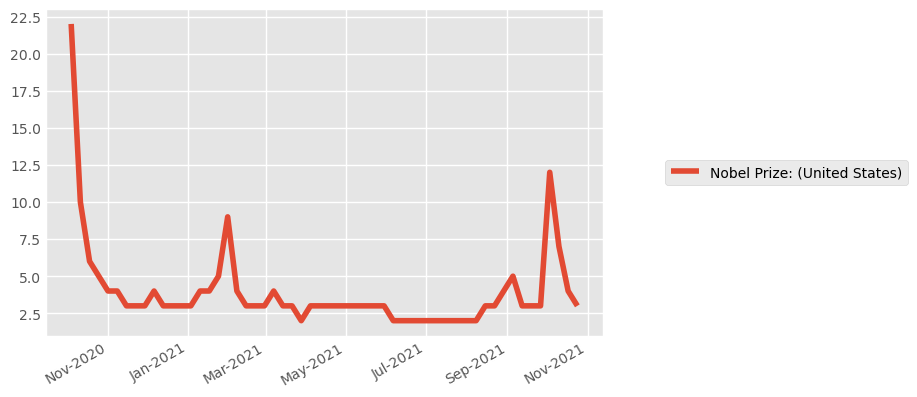

In [9]:
EDS.ptrend(Nobel_October,"Week","Nobel Prize: (United States)",fmtdate="%b-%Y")

### <font color=blue> **Question 1. Tools for examining time trend data** </font>
In preparing to look at COVID data we will first plot Chemistry and Biology [Google Trend](https://trends.google.com/trends/) search volumes for the five year period included in the Nobel data above. The Google Trend data gives the relative search volume as a function of day or week over a time period. An example of Google Trend data is searching for the trend of Turkey, Thanksgiving and Football as shown below.

![Turkey Google Trend](turkey_trend.png "Turkey Google Trend")
Examine this data for the Nobel prize and Biology. Nobel prizes are announced early October annually and awarded December 10 at 7:00 AM in honor of Alfred Nobel's death.

**Chemistry**

In [ ]:
EDS.ptrend(Nobel,"Week",...,fmtdate="%b-%Y")

**Biology**

In [ ]:
EDS.ptrend(...)

Next we will create a new table which is subset of the original Table containing only data for 2023.

In [ ]:
Nobel_2023 = EDS.FilterTdate(Nobel,'01/01/2023','12/31/2023')
Nobel_2023

**Biology in 2023**
Now plot the data just for 2023 using the new table `Nobel_2023`

In [ ]:
testcheck = EDS.ptrend(...,...,...,fmtdate="%b-%Y")

In [ ]:
check('tests/q1new.py')

### <font color=blue> **Question 2. Back to COVID Data Analysis** </font><br />
Now let's create and look at late 2023 COVID data. Now use the Nobel example above to define a subset of the data to examine trends during all of November and December of 2021.

In [ ]:
COVID # Complete COVID data from above

In [ ]:
Late2021 = EDS.FilterTdate(...)
Late2021

In [ ]:
check('tests/q2new.py')

### Plot
If we attempt to plot using the 'date' column the bottom axis has starnge numbers which are multiplied by 1e9 ($1\cdot 10^9$) as shown in the lower right corner of the plot. These are the number of seconds from the epoch (January 1, 1970).  Another name for this time unit is UNIX time which has an [interesting history](https://en.wikipedia.org/wiki/Unix_time#:~:text=History,-Learn%20more&text=The%20earliest%20versions%20of%20Unix,two%20and%20a%20quarter%20years.). This unit of time is a way that is convenient for computers to store time as an integer but not at all convenient for us as data scientists! Using the `EDS.ptrend` function will alleviate this problem.

In [ ]:
Late2021.plot("date", "cases_avg_per_100k")

#### Now use EDS.ptrend

In [ ]:
EDS.ptrend(Late2021,"date","cases_avg_per_100k",fmtdate="%b-%Y")

#### Now change format to get days
This is in the last part, `fmtdate="%b-%Y"` This type of format string is common in coding and this particular one relates to a variety of codes for parts of a date.
|Code|What|Example|
|---|---|---|
|%b|Month abbreviated|Dec|
|%B|Month|December|
|%y|Year abbreviated|24|
|%Y|Year|2024|
|%d|Day of month|06|
|%a|Weekday abbreviated|Fri|
|%A|Weekday|Friday|
|%j|Day number 001-366|143|
|%W|Week number of year|41|
|%H|Hour of day (24)|17|
|%h|Hour of day (12)|5|


**Now get ptrend to plot using month-day-year format**. This is helpful since we are now only looking at two months, the day becomes more important.

In [ ]:
EDS.ptrend(Late2021,"date","cases_avg_per_100k",fmtdate="...")

### Histogram
Many of the matplotlib plot are available as methods availabe to data tables. A histogram method, for example, is realized by appending .hist('column name')

In [ ]:
Late2021.hist('deaths')

We can also access summary statistics for the datascience table

In [ ]:
Late2021.stats()

### <font color=blue> **Question 3.** </font><br />
Construct a histogram and stats for November - December 2020 and compare this to those from November - December 2021 in a markdown cell below the histogram and statistics.

In [ ]:
Late2020 = ...
Late2020

The `.hist()` Table method has additional arguments to get more bins and change the range for the histogram among other arguments as shown below.

In [ ]:
Late2020.hist('deaths',bins = 30, range =[0,4000])
Late2021.hist('deaths', bins = 30, range =[0,4000])

#### <font color=blue> Write your comparison between Late2020 and Late2021 histograms in this markdown cell (double click to edit) </font>

...

In [ ]:
check('tests/q3a.py')

### <font color=blue> **Question 4.** </font><br />
Now use the EDS.ptrend() function plot your Late2020 data and then the Late2020.  In the markdown cell below, describe the differences in the line graphs between 2020 and 2021.  

#### <font color=blue> Write your comparison in this markdown cell (double click to edit)</font>

...

In [ ]:
check('tests/q4a.py')

## 2. Defining functions

Functions return a value(s) for values of one or more variables or arguments. In algebra we develop the concept of functions such as the following:
$$ f(x) = 3 \cdot x-5 $$
If we substitute the value:
$$ x = 3$$
$$f(3) = 3 \cdot 3-5 = 4$$

This function can be coded in Python in the following straightforward way:
```python
def f(x):
    result = 3*x - 5
    return result
```
To compute the value of the function f(x) at x = 3:
```python
f(3)
4
```

### <font color=blue> **Question 5A.** </font>

Define a Python function for the following algebraic function:
$$ f(x) = 2 \cdot x + 5 $$

In [2]:
def f(x):
    ...
    return ...

Use your function to evaluate the function f(x) at x = 4

In [ ]:
f(...)

In [ ]:
check('tests/q5a.py')

### Visualizing functions
We can use the matplotlib plot function to visualize your above function. In the EDS module there is a function to plot functions which takes three arguments, the function name, the x axis range, the y axis range. The axis range is given as a list with the minimum and maximum values given, [-5,5] provide the range from -5 to 5.

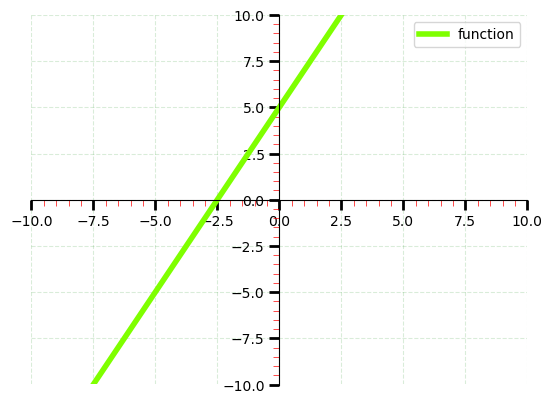

True

In [6]:
EDS.fplot(f,[-10,10],[-10,10])

In [ ]:
EDS.fplot(f,[-20,20],[-20,20])

#### New function
$$ g(x) = x^2 $$

In [9]:
def g(x):
    result = x**2
    return result

In [ ]:
EDS.fplot(g,[-10,10],[-10,10])

### Simple Percentage Function Example
Let's write a very simple function that converts a proportion to a percentage by multiplying it by 100.  For example, the value of `to_percentage(.5)` should be the number 50.  (No percent sign.)

A function definition has a few parts.

##### `def`
It always starts with `def` (short for **def**ine):

    def

##### Name
Next comes the name of the function.  Let's call our function `to_percentage`.
    
    def to_percentage

##### Signature
Next comes something called the *signature* of the function.  This tells Python how many arguments your function should have, and what names you'll use to refer to those arguments in the function's code.  `to_percentage` should take one argument, and we'll call that argument `proportion` since it should be a proportion.
    '''
    def to_percentage(proportion)
    '''

We put a colon after the signature to tell Python it's over.

    def to_percentage(proportion):

##### Documentation
Functions can do complicated things, so you should write an explanation of what your function does.  For small functions, this is less important, but it's a good habit to learn from the start.  Conventionally, Python functions are documented by writing a triple-quoted string:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
    
    
##### Body
Now we start writing code that runs when the function is called.  This is called the *body* of the function.  We can write anything we could write anywhere else.  First let's give a name to the number we multiply a proportion by to get a percentage. Note that all of the lines of code in the body of the function must be indented by the same amount, typically four spaces. Python knows it has reached the end of the function when the indentation stops.

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100

##### `return`
The special instruction `return` in a function's body tells Python to make the value of the function call equal to whatever comes right after `return`. The function will *return* that value to the main body of the code. We want the value of `to_percentage(.5)` to be the proportion .5 times the factor 100, so we write:

    def to_percentage(proportion):
        """Converts a proportion to a percentage."""
        factor = 100
        return proportion * factor

### <font color=blue> **Question 5B.** </font>

Define `to_percentage` in the cell below.  Call your function to convert the proportion 0.20 to a percentage.  Name that percentage `twenty_percent`.

In [ ]:
def ...
    """ ... """
    ... = ...
    return ...

In [ ]:
twenty_percent = ...
twenty_percent

In [ ]:
check('tests/q5a.py')

Write a second function which computes the density of an ideal gas off a given molecular weight, temperature, pressure. 
$$ PV = nRT $$
$$ \frac{n}{V} = \frac{P}{RT} $$
To convert to grams from number of moles we use the molecular mass, $ M $. <br>Water has a molecular mass of $ M = 18.0 \frac{g}{mol}$ <br>
density is given the symbol $\rho $ and has units of $ \frac{g}{L} $ <br><br>
$$  \rho = \frac{M\cdot P}{R\cdot T} $$



In [ ]:
def density(P, T, M):
    """  ...    """   
    R = 0.082057
    ...
    ...
    return ...

In [ ]:
density(...,...,...)

Test the function by calculating the density of water vapor (gas, $ M = 18.0 \frac{g}{mol}$ ) at 1 atm and 298 K. R is the gas constant.<br> $$ R = 0.082057 $$

Now create an array with temperatures in Kelvin from freezing, 273.15, to 313 (40 $\degree$ C) in 1.0 degree steps With the array, create a new array using the above `density` function. Use a scatter plot of these arrays.

In [ ]:
check('tests/q5b.py')

Matplotlib can generate a variety of figures and given how we initialize it in this lab is referenced with the plt. prefix. The traditional .plot() is also known as a line plot. A scatter plot is useful for exploring the relationship bewteen two or more variables and uses markers for data points. Matplotlib takes one or more numpy arrays as arguments to plot. Matplotlib can also use lists as arguments.  An example is shown below.

In [ ]:
x = np.array([3, 8, 5, 6, 1, 9, 6, 7, 2, 1, 8])
y = np.array([4, 5, 2, 4, 6, 1, 4, 6, 5, 2, 3])
color = "red"
plt.scatter(x, y, c = color, label = color)

Same scatter plot with lists:

In [ ]:
x = [3, 8, 5, 6, 1, 9, 6, 7, 2, 1, 8]
y = [4, 5, 2, 4, 6, 1, 4, 6, 5, 2, 3]
color = "orange"
plt.scatter(x, y, c = color, label = color)

Use the same approach to plot the density computer with your function versus the temperature. Hint: you can use list comprehension to create a list with densities for given temperatures.

In [ ]:
plt.scatter(..., ...)

### <font color=blue> **Question 6.** </font>

Now define another function which takes the ratio of two number and then uses the *'to_percentage'* function above to convert it into a percentage. One issue is when the denominator is zero we get a result which is not a number or `nan` in Python. This can be changed to a zero as a place holder with a little trick shown below that can be incorporated as two lines of your code.

In [ ]:
# First approach to deal with dividing by zero
from math import nan

z = nan
print("First: ", z)
# Use this part in your function
if z != z:  # if conditional statement
    z = 0
# Up to here
print("Now: ", z)

In [ ]:
# Now your function...
def ratio(x1,x2):
    """ Computes a ratio of x1 to x2 """
    ...
    r = to_percentage(z)
    return r

In [ ]:
check('tests/q6a.py')

### COVID cases leading to bad outcomes
Now we will apply the function to our COVID data. Here we will need to use the *with_columns* method of a Table object to add the result of applying the ratio function with two columns as arguments. These columns will be *deaths* and *cases*. The percentage return by the function will create a new column.<br>
<br>See Inferential Thinking 8.1.1 for inspiration: <br> https://inferentialthinking.com/chapters/08/1/Applying_a_Function_to_a_Column.html

### <font color=blue> **Question 7.** </font> 

Now apply your function to create a new column, *deathrate*. Examine the histogram for deathrate. Now plot the trend for *deathrate* for the entire timeperiod of the dataset. Remember the special codes from above to define the x ('date') and y ('deathrate') data to plot. Discuss the results in the markdown cell below.

In [ ]:
COVID = COVID.with_columns("deathrate",...).sort("deathrate")
# Check that there are no nan...
COVID

In [ ]:
# Histogram
...

Use `EDS.ptrend()` to plot the deathrate.

#### <font color=blue> Your discussion of results from question 7 in this markdown cell (double click to edit)</font>

 <font color='blue'>.............</font>

In [ ]:
check('tests/q7a.py')

### <font color=blue> **Question 8.** </font>

At the end of each lab, please include a reflection. 
* How did this lab go? 
* What aspects of visualization or functions do you find confusing?
* Were there questions you found especially challenging you would like your instructor to review in class? 
* How long did the lab take you to complete?

Share your feedback so we can continue to improve this class!

**Insert a markdown cell below this one and write your reflection on this lab.**

**Congratulations** , you're done with lab 4! Be sure to
run all the tests and verify that they all pass (the next cell has a shortcut for that),
Save and Checkpoint from the File menu
Run the last two cells for partial grading. Comments and markdown will be graded separately. 

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import glob
from gofer.ok import check
correct = 0
for x in ['q1new','q2new','q3a','q4a','q6a', 'q7a'] :
    print('Testing question {}: '.format(str(x)))
    g = check('tests/{}.py'.format(str(x)))
    if g.grade == 1.0:
        print("Passed")
        correct += 1
    else:
        print('Failed')
        display(g)

print('Grade:  {}'.format(str(correct/6)))

In [ ]:
print("Nice work ",name, user)
import time;
localtime = time.asctime( time.localtime(time.time()) )
print("Submitted @ ", localtime)